#### Student "Pass or Fail" prediction

In [1]:
import pandas as pd
d = pd.read_csv('student-por.csv',sep=';')

In [2]:
#generate a binary label based on G1+G2+G3
d['pass'] = d.apply(lambda row: 1 if (row['G1'] + row['G2'] + row['G3']) >= 35 else 0 , axis=1 )
d = d.drop(['G1','G2','G3'], axis=1)
d

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,yes,no,5,4,2,1,2,5,4,0
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,yes,no,4,3,4,1,1,1,4,1
646,MS,F,18,U,GT3,T,1,1,other,other,...,no,no,1,1,1,1,1,5,6,0
647,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,6,0


In [3]:
#use on-hot encoding on categorical columns
d = pd.get_dummies(d, columns=['sex','school','address','famsize','Pstatus','Mjob','Fjob','reason','guardian',
                               'schoolsup','famsup','paid','activities','nursery','higher','internet','romantic'])
d

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,False,True,False,True,True,False,True,False
1,17,1,1,1,2,0,5,3,3,1,...,True,False,True,False,False,True,False,True,True,False
2,15,1,1,1,2,0,4,3,2,2,...,True,False,False,True,False,True,False,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,False,True,False,True,False,True,False,True,False,True
4,16,3,3,1,2,0,4,3,2,1,...,True,False,False,True,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,5,4,2,1,...,False,True,True,False,False,True,False,True,True,False
645,18,3,1,1,2,0,4,3,4,1,...,True,False,False,True,False,True,False,True,True,False
646,18,1,1,2,2,0,1,1,1,1,...,False,True,False,True,False,True,True,False,True,False
647,17,3,1,2,1,0,2,4,5,3,...,True,False,True,False,False,True,False,True,True,False


In [4]:
#shuffle rows
d = d.sample(frac=1)
#split training and testing data
d_train = d[:500]
d_test = d[500:]

d_train_att = d_train.drop(['pass'], axis=1)
d_train_pass = d_train['pass']

d_test_att = d_test.drop(['pass'], axis=1)
d_test_pass = d_test['pass']

d_att = d.drop(['pass'], axis=1)
d_pass = d['pass']


#number of passing in whole dataset
import numpy as np
print("Passing: %d out of %d (%.2f%%)" % ( np.sum(d_pass),len(d_pass), 100*float(np.sum(d_pass)/len(d_pass))  ) )

Passing: 328 out of 649 (50.54%)


# Start building the decision tree

In [5]:
#fit the decision tree
from sklearn import tree
t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
t = t.fit(d_train_att,d_train_pass)

In [6]:
#save tree 
tree.export_graphviz(t,out_file="student_performance.dot",label="all", impurity=False, proportion=True, 
                     feature_names=list(d_train_att),class_names=['fail','pass'], filled=True, rounded=True)

In [7]:
#convert to png using system command (requires Graphviz package)
from subprocess import call
call(['dot','-Tpng','student_performance.dot','-o','student_performance.png','-Gdpi=600'])

#Dispaly in jupyter notebook
from IPython.display import Image
Image(filename='student_performance.png')

### Explain the Tree
##### In this case if failure is less than or equal to 0.5, that means it is true and it placed on left-hand side of the tree. Consider tree is always true on left side and false on right side, which means there are no prior failures. In the representation we can see left side of the tree is mostly in blue which means it is predicting a pass even though there are few questions as compared to the failure maximum of 5 questions. The tree is o n right side if failure is less than 0.5, this makes the student fail, which means the first question is false. Prediction is failure if in orange color but as it proceeds further to more questions since we have used max_depth = 5.

### check the score of the tree

In [8]:
t.score(d_test_att,d_test_pass)

0.697986577181208

### cross verify the result to be assured that the dataset is trained perfectly

In [9]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(t,d_att, d_pass, cv=5)
#show average score
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2 ) )

Accuracy: 0.68 (+/- 0.09)


#### We use various max_depth values from 1 to 20, Considering we make a tree with one question or with 20 questions having depth value of 20 which will give us questions more than 20 which is you will have to go 20 steps down to reach a leaf node.

#### We will use an array to store the data depneding on max_depth to let us creating a graph showing the accuracy variation while changing the max_depth

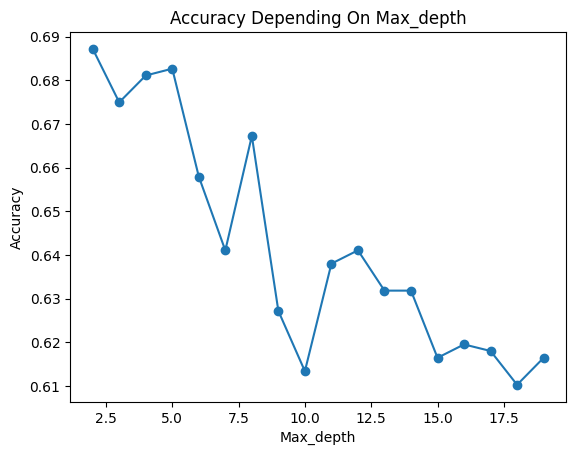

In [15]:
depth_acc = np.empty( (19,3), float )
i=0
for max_depth in range(1,20):
    t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    t = t.fit(d_train_att, d_train_pass)
    scores = cross_val_score(t, d_att, d_pass, cv=5)
    depth_acc[i,0] = max_depth
    depth_acc[i,1] = scores.mean()
    depth_acc[i,2] = scores.std()*2
    i+=1
#GRAPH
import matplotlib.pyplot as plt
xpointes = depth_acc[1:,0]
ypointes = depth_acc[1:,1]
plt.plot(xpointes,ypointes,marker='o')
plt.title("Accuracy Depending On Max_depth")
plt.xlabel("Max_depth")
plt.ylabel("Accuracy")
plt.show()


### On analysing 
#### Our model shows that having more depth does not necessarily help, nor does having a single question of did you fail previously? provide us with the same amount of information as two or three questions would give us.